# Exploratory Data Analysis and Preprocessing

In [1]:
# Understand data
# Clean the data - missing value, outlier, skewness
# Make data appropriate for machine learning
# Feature engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# NaN, NULL

np.nan

nan

In [4]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

mydict = {"name":name,"math":math,"science":science}

In [5]:
df = pd.DataFrame(mydict)

In [6]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


## Missing values

In [7]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [8]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [9]:
# drop null values

df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [10]:
df.dropna(axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [11]:
# fill the null values

In [12]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [13]:
math_mean = df["math"].mean()
science_mean = df["science"].mean()

In [14]:
math_mean

79.75

In [15]:
science_mean

76.33333333333333

In [16]:
df["math"].fillna(math_mean, inplace=True)

In [17]:
df["science"].fillna(science_mean, inplace=True)

In [18]:
df

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


## Unwanted values

In [19]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,"?",85]
science = [78,75,76,77,76]

mydict = {"name":name,"math":math,"science":science}

In [20]:
df = pd.DataFrame(mydict)

In [21]:
df

,name,math,science
0,john,89,78
1,jack,78,75
2,jill,67,76
3,kenny,?,77
4,kevin,85,76


In [22]:
df.isnull().sum()

name       0
math       0
science    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
name       5 non-null object
math       5 non-null object
science    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [24]:
df["math"].unique()

array([89, 78, 67, '?', 85], dtype=object)

In [25]:
for data in df["math"]:
    if not(str(data).isnumeric()):
        print(data)
        

?


In [26]:
# replace

df["math"].replace("?",np.nan, inplace=True)

In [27]:
math_mean = df["math"].mean()

In [28]:
df["math"].fillna(math_mean,inplace=True)

In [29]:
df

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


## Drop rows and columns as per choice

In [30]:
df

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


In [31]:
df.drop(4)

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,76
3,kenny,79.75,77


In [32]:
df.drop([0,1])

,name,math,science
2,jill,67.00,76
3,kenny,79.75,77
4,kevin,85.00,76


In [33]:
# drop columns

In [34]:
df.drop("science",axis=1)

,name,math
0,john,89.00
1,jack,78.00
2,jill,67.00
3,kenny,79.75
4,kevin,85.00


In [35]:
df.drop(["math","science"],axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [36]:
# cars dataset

In [37]:
cars = pd.read_csv("cars.csv")

In [38]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [39]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [41]:
for data in cars["normalized-losses"]:
    if not(str(data).isnumeric()):
        print(data)

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [42]:
 for data in cars["horsepower"]:
    if not(str(data).isnumeric()):
        print(data)       
        

?
?


In [43]:
cars["normalized-losses"].replace("?",np.nan,inplace=True)

In [44]:
cars["normalized-losses"] = cars["normalized-losses"].astype("float")

In [45]:
cars["normalized-losses"].fillna(cars["normalized-losses"].mean(),inplace=True)

In [46]:
cars["horsepower"].replace("?",np.nan,inplace=True)
cars["horsepower"] = cars["normalized-losses"].astype("float")
cars["horsepower"].fillna(cars["normalized-losses"].mean(),inplace=True)

In [47]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,122.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,122.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,122.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,164.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,164.0,18,22,17450


## Outliers

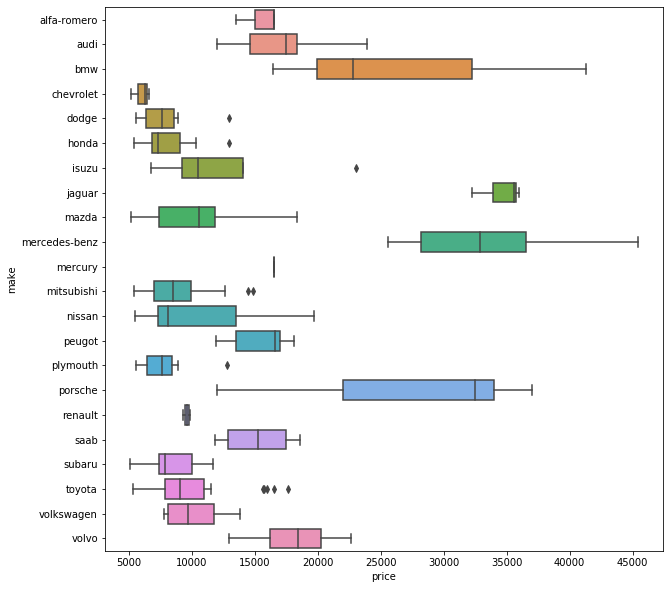

In [48]:
plt.figure(figsize=(10,10))

sns.boxplot(data=cars,x="price",y="make")

plt.show()

In [49]:
cars[(cars["make"] == "toyota") & (cars["price"] > 15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,134.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,197.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,197.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,90.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,122.0,19,24,15750


In [50]:
cars.drop([172,178,179,180,181],inplace=True)

In [51]:
cars[(cars["make"] == "isuzu") & (cars["price"] > 22000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,122.0,38,43,23000


In [52]:
cars.drop(45,inplace=True)

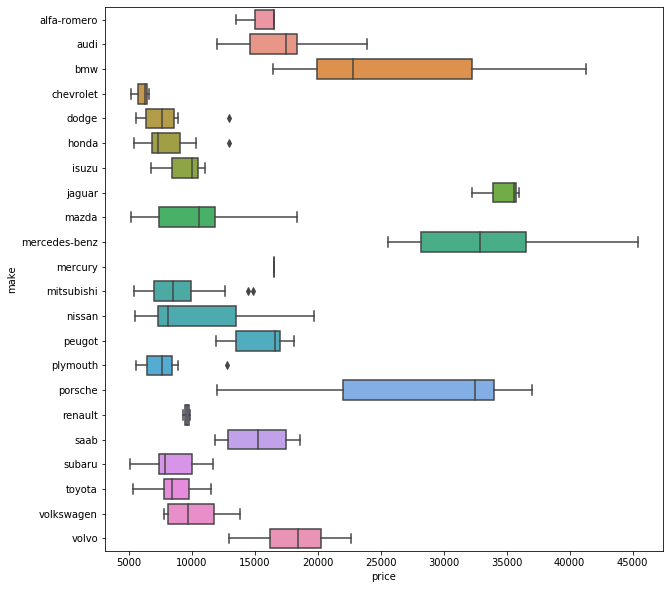

In [53]:
plt.figure(figsize=(10,10))

sns.boxplot(data=cars,x="price",y="make")

plt.show()

## Handling categorical data

In [54]:
cars_cat = cars.select_dtypes(object)

In [55]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [56]:
cars_num = cars.select_dtypes(["float64","int64"])

In [57]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,122.0,21,27,13495
1,3,122.0,64.1,48.8,130,122.0,21,27,16500
2,1,122.0,65.5,52.4,152,122.0,19,26,16500
3,2,164.0,66.2,54.3,109,164.0,24,30,13950
4,2,164.0,66.4,54.3,136,164.0,18,22,17450


In [58]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [59]:
# One hot encoding

In [60]:
len(cars_cat["make"].unique())

22

In [61]:
pd.get_dummies(cars_cat["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [62]:
pd.get_dummies(cars_cat["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# Label encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
le.fit_transform(cars["drive-wheels"])

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [67]:
for col in cars_cat:
    le = LabelEncoder()
    cars_cat[col] = le.fit_transform(cars_cat[col])

/home/sukamal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [70]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,122.0,21,27,13495
1,3,122.0,64.1,48.8,130,122.0,21,27,16500
2,1,122.0,65.5,52.4,152,122.0,19,26,16500
3,2,164.0,66.2,54.3,109,164.0,24,30,13950
4,2,164.0,66.4,54.3,136,164.0,18,22,17450


In [71]:
from scipy.stats import skew

In [72]:
skew(cars_num["price"])

1.833958003138736

column:  symboling
skew:  0.21323314897251855


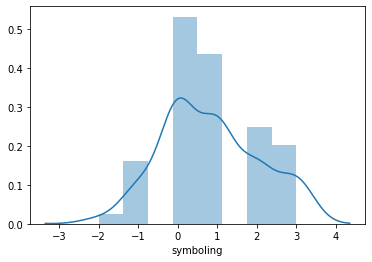

----------------------------------
column:  normalized-losses
skew:  0.84594732303092


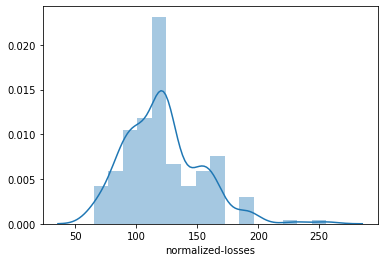

----------------------------------
column:  width
skew:  0.9174462035447307


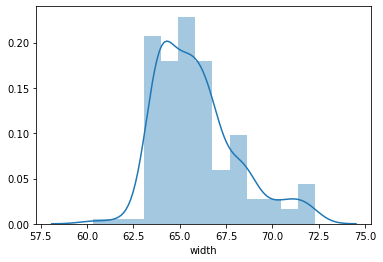

----------------------------------
column:  height
skew:  0.036252143473982396


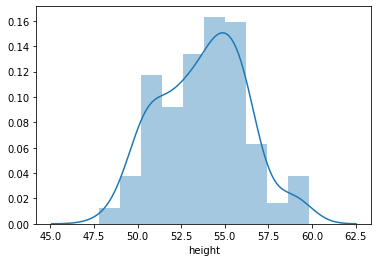

----------------------------------
column:  engine-size
skew:  2.014650224754104


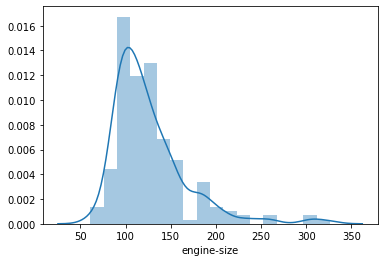

----------------------------------
column:  horsepower
skew:  0.84594732303092


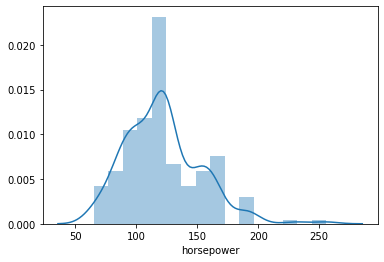

----------------------------------
column:  city-mpg
skew:  0.633498512160688


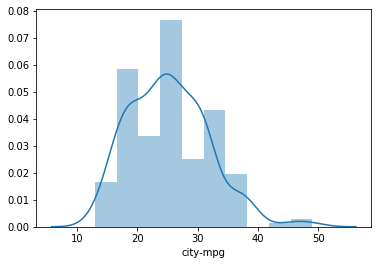

----------------------------------
column:  highway-mpg
skew:  0.5131240234054851


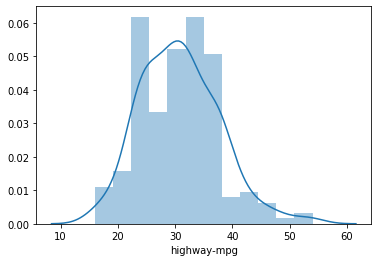

----------------------------------
column:  price
skew:  1.833958003138736


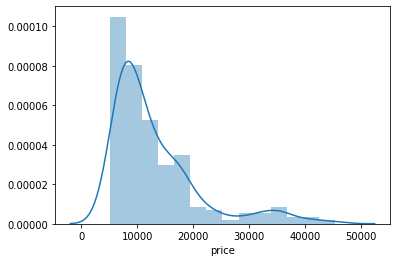

----------------------------------


In [74]:
for col in cars_num:
    print("column: ",col)
    print("skew: ",skew(cars_num[col]))
    
    plt.figure()
    sns.distplot(cars_num[col])
    plt.show()
    
    print("----------------------------------")

In [75]:
cars_num.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.441895,-0.255172,-0.545755,-0.120348,0.441895,-0.027495,0.045654,-0.089511
normalized-losses,0.441895,1.000000,0.068923,-0.365574,0.094535,1.000000,-0.211989,-0.167934,0.129392
width,-0.255172,0.068923,1.000000,0.283747,0.733867,0.068923,-0.638136,-0.673350,0.730253
height,-0.545755,-0.365574,0.283747,1.000000,0.072042,-0.365574,-0.047991,-0.109124,0.141306
engine-size,-0.120348,0.094535,0.733867,0.072042,1.000000,0.094535,-0.646658,-0.670043,0.865830
horsepower,0.441895,1.000000,0.068923,-0.365574,0.094535,1.000000,-0.211989,-0.167934,0.129392
city-mpg,-0.027495,-0.211989,-0.638136,-0.047991,-0.646658,-0.211989,1.000000,0.970589,-0.675322
highway-mpg,0.045654,-0.167934,-0.673350,-0.109124,-0.670043,-0.167934,0.970589,1.000000,-0.698829
price,-0.089511,0.129392,0.730253,0.141306,0.865830,0.129392,-0.675322,-0.698829,1.000000


In [76]:
# good correlation - width, engine-size, city-mpg, highway-mpg
# why - because they have good correlation

# bad correlation - symbolling,normalized-losses,horsepower, height

In [80]:
# reduce skewness - sqrt, log

cars_num["normalized-losses"] = np.sqrt(cars_num["normalized-losses"])

cars_num["horsepower"] = np.sqrt(cars_num["horsepower"])

/home/sukamal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sukamal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [81]:
skew(cars_num["normalized-losses"])

0.10720071653511148

In [82]:
skew(cars_num["horsepower"])

0.40783336300574646

In [85]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [86]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,1.823035,64.1,48.8,130,11.045361,21,27,13495,0,1,0,2,0,0
1,3,1.823035,64.1,48.8,130,11.045361,21,27,16500,0,1,0,2,0,0
2,1,1.823035,65.5,52.4,152,11.045361,19,26,16500,0,1,2,2,0,5
3,2,1.891714,66.2,54.3,109,12.806248,24,30,13950,1,1,3,1,0,3
4,2,1.891714,66.4,54.3,136,12.806248,18,22,17450,1,1,3,0,0,3


In [87]:
# Scaling
# feature engineering

In [89]:
y = cars_new["price"]
X = cars_new.drop("price",axis=1)

In [90]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,1.823035,64.1,48.8,130,11.045361,21,27,0,1,0,2,0,0
1,3,1.823035,64.1,48.8,130,11.045361,21,27,0,1,0,2,0,0
2,1,1.823035,65.5,52.4,152,11.045361,19,26,0,1,2,2,0,5
3,2,1.891714,66.2,54.3,109,12.806248,24,30,1,1,3,1,0,3
4,2,1.891714,66.4,54.3,136,12.806248,18,22,1,1,3,0,0,3


In [91]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [99]:
data = np.array([10,20,30,40,50])

In [103]:
mm = MinMaxScaler()
mm.fit_transform(data.reshape(-1,1))

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [104]:
ss = StandardScaler()
ss.fit_transform(data.reshape(-1,1))

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [109]:
for col in X:
   ss = StandardScaler()
   X[col] = ss.fit_transform(X[[col]])

In [110]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.773413,0.131697,-0.832941,-2.009243,0.092215,0.084353,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455
1,1.773413,0.131697,-0.832941,-2.009243,0.092215,0.084353,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455
2,0.139574,0.131697,-0.184011,-0.548198,0.620643,0.084353,-0.964105,-0.704886,-1.930714,0.334263,-0.740962,1.246692,-0.123718,1.970356
3,0.956494,1.335124,0.140454,0.222909,-0.412193,1.360043,-0.196063,-0.121026,-1.770559,0.334263,0.448163,-0.564196,-0.123718,-0.077168
4,0.956494,1.335124,0.233158,0.222909,0.236332,1.360043,-1.117713,-1.288746,-1.770559,0.334263,0.448163,-2.375084,-0.123718,-0.077168


In [111]:
# feature engineering - technique of creating new feature with existing features

In [ ]:
# latitude
# longitude

# distance

In [112]:
X["area"] = X["width"] * X["height"]

In [113]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,1.773413,0.131697,-0.832941,-2.009243,0.092215,0.084353,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455,1.673581
1,1.773413,0.131697,-0.832941,-2.009243,0.092215,0.084353,-0.656888,-0.558921,-1.930714,0.334263,-3.119212,1.246692,-0.123718,-3.148455,1.673581
2,0.139574,0.131697,-0.184011,-0.548198,0.620643,0.084353,-0.964105,-0.704886,-1.930714,0.334263,-0.740962,1.246692,-0.123718,1.970356,0.100874
3,0.956494,1.335124,0.140454,0.222909,-0.412193,1.360043,-0.196063,-0.121026,-1.770559,0.334263,0.448163,-0.564196,-0.123718,-0.077168,0.031309
4,0.956494,1.335124,0.233158,0.222909,0.236332,1.360043,-1.117713,-1.288746,-1.770559,0.334263,0.448163,-2.375084,-0.123718,-0.077168,0.051973


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred = lr.predict(X_test)

In [123]:
lr.score(X_test,y_test)

0.7780047288678992

In [124]:
car = ["audi","bmw","ferrari","tesla"]
distance = ["1000km","2000km","25000km","10000km"]
speed = ["200 km/h","300 km/h","400 km/h","200 miles/h"]

In [125]:
cars_dict = {"car":car,"distance":distance,"speed":speed}

In [126]:
df = pd.DataFrame(cars_dict)

In [127]:
df

,car,distance,speed
0,audi,1000km,200 km/h
1,bmw,2000km,300 km/h
2,ferrari,25000km,400 km/h
3,tesla,10000km,200 miles/h


In [138]:
def clean_distance(x):
    return int(str(x)[:-2])

In [142]:
df["distance"] = df["distance"].map(clean_distance)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
car         4 non-null object
distance    4 non-null int64
speed       4 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
